In [1]:
from math import sin,cos,pi,fabs
import math, os
import matplotlib.pyplot as plt
from random import randint

In [2]:
def f(x) -> float:
  return 2*sin(x+2)

In [3]:
def F(x) -> float:
  return -2*cos(x+2)

In [4]:
print(f"f(x){f(2)}")
print(f"f(x){F(2)}")

f(x)-1.5136049906158564
f(x)1.3072872417272239


In [5]:
a = 0
b = math.pi/4

In [6]:
I0 = F(b)-F(a)
I0

1.0421675803371797

In [7]:
def I_N(N):
  a = 0
  b = math.pi/4
  h = (b - a)/ N
  Int_N = f(a)+f(b)
  for i in range(1,N):
    if i % 2 == 0:
      Int_N += 2 * f(a + i * h)
    else:
      Int_N += 4 * f(a + i * h)

  Int_N = Int_N * (h / 3);
  return Int_N

In [8]:
I_N(2)

1.0423078404340849

In [9]:
def e(N):
  return fabs(I_N(N)-I0)
e(2)

0.00014026009690515373

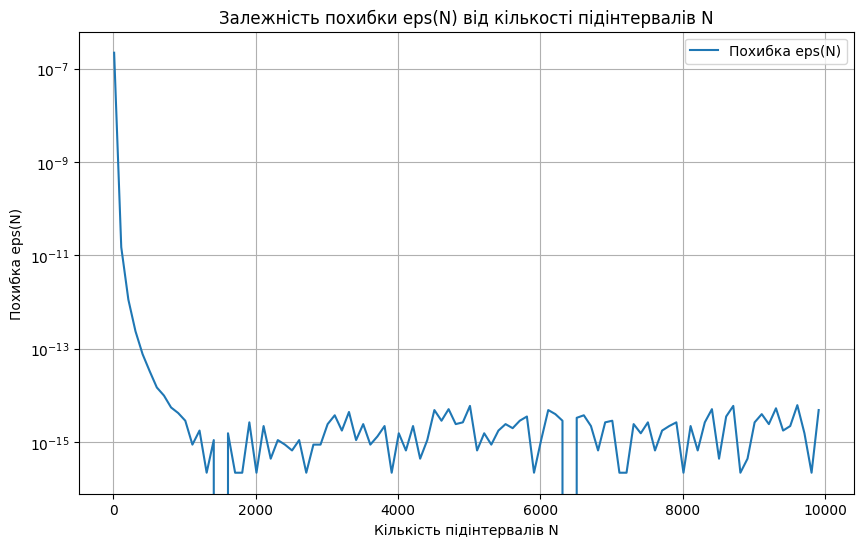

In [10]:
N_values = range(10, 10001, 100)
errors = [e(N) for N in N_values]

plt.figure(figsize=(10, 6))
plt.plot(N_values, errors, label='Похибка eps(N)')
plt.xlabel('Кількість підінтервалів N')
plt.ylabel('Похибка eps(N)')
plt.title('Залежність похибки eps(N) від кількості підінтервалів N')
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.show()

In [11]:
N_opt = None
eps_opt = None
target_accuracy = 1e-12
N = 2

while True:
    current_error = e(N)
    if current_error < target_accuracy:
        N_opt = N
        eps_opt = current_error
        break
    N += 2

print(f"N_opt: {N_opt}")
print(f"eps_opt: {eps_opt}")

N_opt: 218
eps_opt: 9.756639940405876e-13


In [12]:
N0 = (N_opt // 16) * 8

eps_N0 = e(N0)

print(f"N0: {N0}")
print(f"eps_N0: {eps_N0}")

N0: 104
eps_N0: 1.883138089908698e-11


In [13]:
I_R = I_N(N0) + (I_N(N0) - I_N(N0 // 2)) / 15
print(f"I_R: {I_R}")

I_R: 1.0421675803371788


In [14]:
eps_R = fabs(I_R - I0)
print(f"eps_R: {eps_R}")

eps_R: 8.881784197001252e-16
